In [ ]:
# Data Exploration and Cleaning
# Load the dataset into a Pandas DataFrame and display the first 5 rows.
# Check the shape, column names, and summary statistics of the dataset.
# Identify and handle missing values (fill or drop based on the data type).
# Convert Transaction_Date into datetime format and extract year, month, and day as new columns.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# add new plot look theme
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6) # fixed figure size for all plots

In [ ]:
# Load the dataset into a Pandas DataFrame and display the first 5 rows.
data = pd.read_csv('credit_card_transactions.csv')
print(data.head())

In [ ]:
# Check the shape, column names, and summary statistics of the dataset.
print("Shape of the dataset:", data.shape)
print("Column names:", data.columns.tolist())
print("Summary statistics:\n", data.describe())

In [ ]:
# Identify and handle missing values (fill or drop based on the data type).
# check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

In [ ]:
# check data types
print("Data types of each column:\n", data.dtypes)

In [ ]:
# change Transaction_Date to datetime
data['Transaction_Date'] = pd.to_datetime(data['Transaction_Date'])

In [ ]:
# check data types
print("Data types of each column:\n", data.dtypes)

In [ ]:
data.columns

In [ ]:
# add new columns for year, month, day
data['Year'] = data['Transaction_Date'].dt.year
data['Month'] = data['Transaction_Date'].dt.month
data['Day'] = data['Transaction_Date'].dt.day

In [ ]:
print(data[['Transaction_Date','Year','Month','Day']].head())

In [ ]:
# Retrieve all transactions made in January 2025.
jan_2025 = data[(data['Year'] == 2025) & (data['Month'] == 1)]
jan_2025.head()
# export jan_2025 to csv
jan_2025.to_csv('january_2025_transactions.csv', index=False)

In [ ]:
# Find transactions where Amount > 700 and Transaction_Type is "Online".
online_transactions = data[(data['Amount'] > 700) & (data['Transaction_Type'] == "Online")]

In [ ]:
# Select only Approved transactions from the dataset.
approved_transactions = data[data['Transaction_Status'] == 'Approved']
# give me number of rows count where Status is Approved
approved_transactions = data[data['Transaction_Status'] == 'Approved']
print("Number of Approved transactions:", len(approved_transactions))

In [ ]:
# Create a new column Discounted_Amount, assuming a 5% discount on all transactions above 500.
data['Discounted_Amount'] = data['Amount']

mask = data['Amount'] > 500

data.loc[mask, 'Discounted_Amount'] = data.loc[mask, 'Amount'] * 0.95

print(data[['Amount', 'Discounted_Amount']].head())

In [ ]:
# amount category 
# 1 low -> Below $100
# 2 medium -> Between $100 - $500
# 3 high -> Above $500

def amount_cat(x):
    if x < 100:
        return "Low"
    elif x <= 500:
        return "Medium"
    else:
        return "High"       
    
data['Amount_Category']  = data['Amount'].apply(amount_cat)
print(data[['Amount','Discounted_Amount','Amount_Category']].head())

In [ ]:
# total amount per category 
total_cat = data.groupby('Category')['Amount'].sum()
print("Total Amount per Category:\n", total_cat)

In [ ]:
# Determine the number of declined transactions per Payment_Mode.
declined = data[data['Transaction_Status'] == 'Declined']
declined_by_mode = declined['Payment_Mode'].value_counts()
print("Number of Declined transactions per Payment_Mode:\n", declined_by_mode)

In [ ]:
# Identify the top 5 most frequent merchants based on transaction count.
top_merchants = data['Merchant'].value_counts().head(5)
print("Top 5 most frequent merchants:\n", top_merchants)

In [ ]:
# check customer info dataset 
customer_info = pd.read_csv('customer_info.csv')
# print(customer_info.head())

# Fraud Detection Indicators
# Find customers who made more than 10 transactions in a single day (potential fraud).
# step no 1 create a new column with date only from Transaction_Date
data['Date'] = data['Transaction_Date'].dt.date
# print(data['Date'].head())

# step no 2 group by Customer_ID and Date and count number of transactions
daily = data.groupby(['Customer_ID','Date']).size()
# print(daily.head(10))

# step no 3 filter customers with more than 10 transactions in a day
month_per_day = daily[daily > 2].reset_index()
print("Customers with more than 10 transactions in a single day:\n", month_per_day)

In [ ]:
data.head()

In [ ]:
# Find transactions where Amount > 800 and Transaction_Type is Online (flag as high-risk)
data["High_Risk"] = (data['Amount'] > 800) & (data['Transaction_Type'] == 'Online')
print(data[['Amount','Transaction_Type','High_Risk']].head())

In [ ]:
# count 
print("Number of High Risk transactions:", data['High_Risk'].sum())

In [ ]:
customer_info = pd.read_csv('customer_info.csv')
print(customer_info.head())
print(data.head())

In [ ]:
# Data Merging and Joining
# Suppose you have another dataset (customer_info.csv) containing Customer_ID, Age, Gender, and Account_Status.
# Merge it with credit_card_transactions.csv using an appropriate join operation.
# Find the average transaction amount per Age group.

# Data Merging and Joining
data_full = pd.merge(data, customer_info, on='Customer_ID', how='left')

In [ ]:
# Exporting Results
# Save the cleaned and processed dataset to a new CSV file.
data_full.to_csv('full_data.csv', index=False)

In [ ]:
data_full.head()
# check null value 
# data_full.isnull().sum()

In [ ]:
# Find the average transaction amount per Age group.
bins = [18, 35, 45, 60, 120]
labels = ["18-30","31-45","46-60","60+"]
data_full['Age_Group'] = pd.cut(data_full["Age"],
                                bins=bins,
                                labels=labels,
                                include_lowest=True)

avg_per_age = data_full.groupby('Age_Group')['Amount'].mean().round(2)
print("Average transaction amount per Age group:\n", avg_per_age)

In [ ]:
plt.figure(figsize=(8,5))
avg_per_age.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Average Transaction Amount per Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Transaction Amount")
plt.xticks(rotation=360)
plt.show()


In [ ]:
sns.histplot(data_full['Amount'], bins=30, kde=True, color='blue')
plt.title("Distribution of Transaction Amounts")
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# bar chart
total_cat = data_full.groupby('Category')['Amount'].sum()
plt.figure(figsize=(8,5))
total_cat.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title("Total Transaction Amount per Category")
plt.xlabel("Category")
plt.ylabel("Total Amount")
plt.xticks(rotation=360)
plt.show()

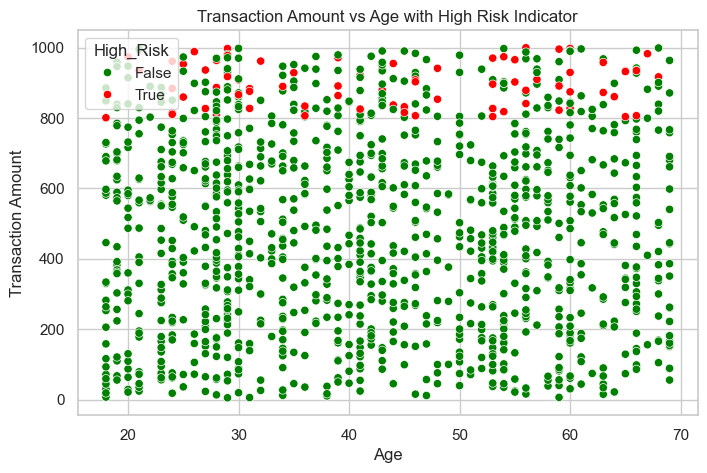

In [44]:
# high risk by age group scatter plot
plt.figure(figsize=(8,5))
sns.scatterplot(data=data_full, x='Age', y='Amount', hue='High_Risk', palette={True: 'red', False: 'green'})
plt.title("Transaction Amount vs Age with High Risk Indicator")
plt.xlabel("Age")
plt.ylabel("Transaction Amount")
plt.show()
